## Exercise 6 - Image classification

### Introduction TODO


### How to use this Jupyter Notebook

The Jupyter Notebook is composed by a series of *cells*, each one containing either Python code or text instructions.
The text instruction that you are currently reading here are inside a *text cell*.

To run a cell, just click on it and then press the `Run` button at the top of the screen, or use the shortcut `Shift - Enter`.

You will not need to run *text cells*.
Only cells containing Python code need to be run.
Make sure that you will execute *code cells* in descending order, from the beginning of this Jupyter Notebook to its end. 
Since this Jupyter Notebook runs online, you will not need to install anything on your personal computer.

If you prefer, and/or if you already have a Python installation on your personal computer, you can also download this notebook from [this GitHub repository](https://github.com/ltelab/RS2022/tree/main/exercise_7) and run it locally.
In this case, you will need to install the packages listed in the [`requirements.txt`](https://github.com/ltelab/RS2022/blob/main/exercise_7/requirements.txt) file.

You are not required to have prior Python programming knowledge.
All you will have to do is to modify the value of some quantities (or *variables*) to achieve the result requested by each section of the exercise.
You will need to interpret these results to answer the questions of the exercise.
However, if you want to experiment with the code provided, feel free to edit the code: the changes that you make will not overwrite the original copy of the notebook.
When logged in through EPFL's Noto platform, your changes will be saved to your session.

**Variables that will need to be modified will be defined in UPPERCASE and preceeded by a comment indicating the request**

A comment is a line of code preceeded by the symbol *#*.
For example:

    # This is a comment

A variable that you will be required to modify will look like the following example:
    
    # Modify the value of the following variable
    VARIABLE_TO_MODIFY = 2

To modify the variable, change the value after the = sign. For example:

    VARIABLE_TO_MODIFY = 3

will change the value of *VARIABLE_TO_MODIFY* from *2* to *3*.

### Note memory consumption

Across the exercise, we provided several code cells that "reset" the notebook, clearing up some RAM memory space.
In theory, those should be sufficient to execute the exercise on EPFL Noto.
If you still encounter a high memory consumption, we suggest two approaches:
- Clear all current outputs by clicking on `Cell` -> `All Output` -> `Clear`
- Re-start the kernel by clicking on `Kernel` -> `Restart & Clear Output`.

In both cases, you will need to continue with the exercise from the cell that loads the python libraries immediately precceding the part of the exercise you will be working on.
By *loading the libraries* we mean the code cells containing lines of codes such as:

    import numpy as np
    import PIL.Image

#### Start the exercise by running the next cell: it will import the libraries needed for the exercise.

In [1]:
import os 
import glob 
# import napari
import rioxarray
import rasterio 
import sklearn 
import colorcet
import matplotlib
import pandas as pd
import numpy as np
import xarray as xr
# import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as c
plt.rcParams['font.size']=15

In [2]:
data_dir = "Data/Australia_2019"

bands_fpattern =  "*(Raw).tiff"
true_color_fname = "2019-05-15-00_00_2019-05-15-23_59_Sentinel-2_L2A_True_color.tiff"
labels_fname = "2019-05-15-00_00_2019-05-15-23_59_Sentinel-2_L2A_Scene_classification_map.tiff" 

band_fpaths = sorted(glob.glob(os.path.join(data_dir, bands_fpattern)))
labels_fpath = os.path.join(data_dir, labels_fname)
true_color_fpath = os.path.join(data_dir, true_color_fname)

In [3]:
# Load true color 
da_true_color = xr.open_dataset(true_color_fpath, engine="rasterio",default_name="true_color")['true_color']
da_true_color = da_true_color.compute()

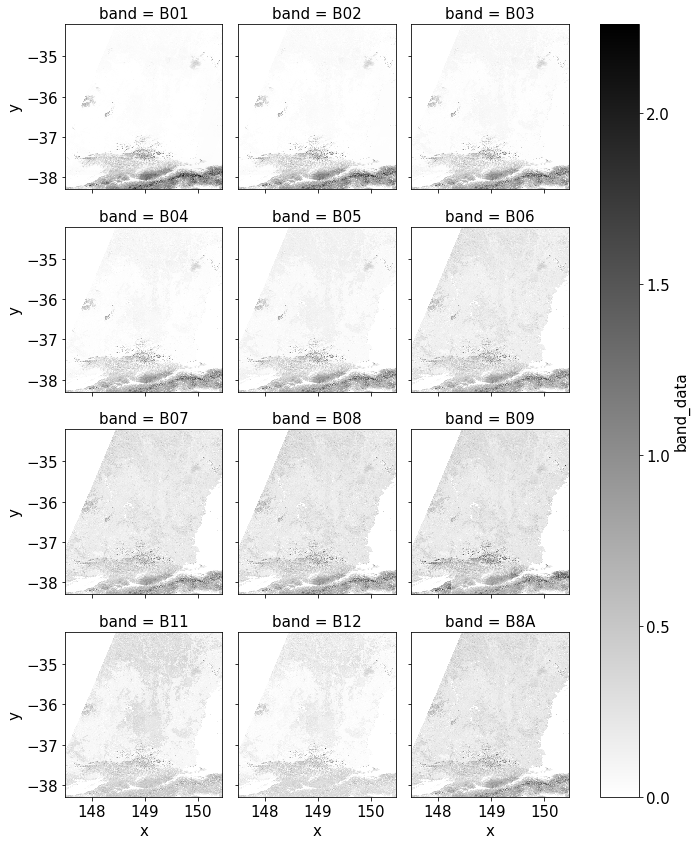

In [4]:
# Load all bands
bands = [os.path.basename(fpath).split("_")[6] for fpath in band_fpaths]
da_bands = xr.open_mfdataset(band_fpaths, engine="rasterio", concat_dim="band", combine="nested")['band_data']
da_bands = da_bands.assign_coords({'band': bands})
da_bands.plot.imshow(col="band", col_wrap=3, cmap="gray_r")

In [5]:
# Load labels RGB
# fig = plt.figure(figsize=(12,12))
da_labels_RGB = xr.open_dataset(labels_fpath, engine="rasterio", default_name="labels")['labels']
x = da_labels_RGB['x']
y = da_labels_RGB['y']



In [6]:
# Retrieve labels id 
da_labels = (da_labels_RGB[0,:,:]*255+1000*da_labels_RGB[1,:,:]*255+1000000*da_labels_RGB[2,:,:]*255).astype('int')#da_stack.unstack('id').transpose('y','x')
label_list = np.unique(da_labels)
for i in range(1,12):
    da_labels = da_labels.where(da_labels!=label_list[i],i)

col_dict={0:"black",
          1:"red",
          2:"saddlebrown",
          3:"green",
          4: 'darkgrey',
          5:'khaki',
          6: 'gray',
          7:'lightgray',
          8:'blue',
          9:'violet',
          10:'deepskyblue',
          11:'white'}

cm = c.ListedColormap([col_dict[x] for x in col_dict.keys()])

labels = np.array(["No data", "Saturated or defective pixel", "Cloud shadows", 
                   "Vegetation","Dark features/Shadows", "Not-vegetated", "Unclassified", "Cloud medium probability",
                   "Cloud high probability", "Water", "Snow or ice", "Thin cirrus"])
len_lab = len(labels)

norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

With the following lines, define the location of pixels corresponding to each type of land cover.
Feel free to play around with the values until you are please with the location of each pixel.
The initial values are set randomly and DO NOT correspond to the actual land type, 
for example the value of I_X_forest and J_X_forest initially set might be in a water area.


TODO: add more explanataions

Scene classification of chosen "Forest" pixel:  Cloud high probability
Scene classification of chosen "Grassland" pixel:  Vegetation
Scene classification of chosen "Bare soil" pixel:  No data
Scene classification of chosen "Water" pixel:  Thin cirrus
Scene classification of chosen "Cities" pixel:  Vegetation
Scene classification of chosen "Clouds" pixel:  Not-vegetated


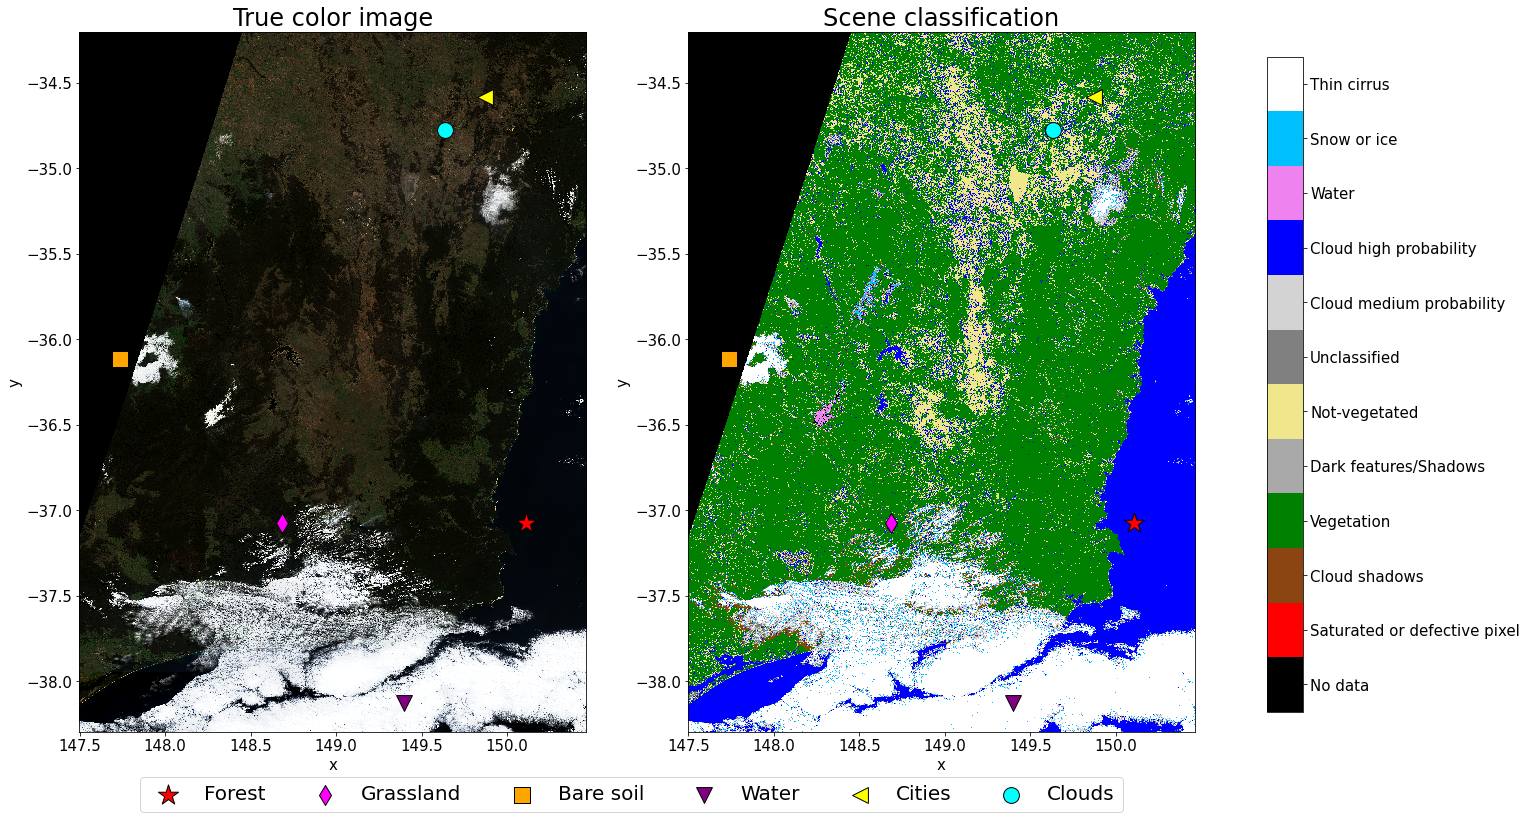

In [42]:
###########################################################################
### EACH OF THE FOLLOWING VALUES SHOULD BE SET UNTIL YOU ARE PLEASED WITH IT
I_X_forest = 1100
J_Y_forest = 1500
I_X_grassland = 500
J_Y_grassland = 1500
I_X_bare_soil = 100
J_Y_bare_soil = 1000
I_X_water = 800
J_Y_water = 2050
I_X_cities = 1000
J_Y_cities = 200
I_X_clouds = 900
J_Y_clouds = 300
############################################################################

print('Scene classification of chosen "Forest" pixel: ',labels[da_labels[J_Y_forest,I_X_forest].data])
print('Scene classification of chosen "Grassland" pixel: ',labels[da_labels[J_Y_grassland,I_X_grassland].data])
print('Scene classification of chosen "Bare soil" pixel: ',labels[da_labels[J_Y_bare_soil,I_X_bare_soil].data])
print('Scene classification of chosen "Water" pixel: ',labels[da_labels[J_Y_water,I_X_water].data])
print('Scene classification of chosen "Cities" pixel: ',labels[da_labels[J_Y_cities,I_X_cities].data])
print('Scene classification of chosen "Clouds" pixel: ',labels[da_labels[J_Y_clouds,I_X_clouds].data])


    
fig,axs = plt.subplots(1,2,figsize=(20,13))
da_true_color.plot.imshow(ax=axs[0])
im=da_labels.plot.imshow(ax=axs[1],cmap=cm,norm=norm,add_colorbar=0)#,cbar_kwargs={'label':labels})
diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')
cbar_ax = fig.add_axes([.95, 0.15, 0.025, 0.7])
cb = fig.colorbar(im, cax=cbar_ax,format=fmt, ticks=tickz)

for ax in axs:
    ax.scatter(x[I_X_forest],y[J_Y_forest],s=450,marker='*',color='red',edgecolor='black',label='Forest')
    ax.scatter(x[I_X_grassland],y[J_Y_grassland],s=200,marker='d',color='magenta',edgecolor='black',label='Grassland')
    ax.scatter(x[I_X_bare_soil],y[J_Y_bare_soil],s=250,marker='s',color='orange',edgecolor='black',label='Bare soil')
    ax.scatter(x[I_X_water],y[J_Y_water],s=250,marker='v',color='purple',edgecolor='black',label='Water')
    ax.scatter(x[I_X_cities],y[J_Y_cities],s=250,marker='<',color='yellow',edgecolor='black',label='Cities')
    ax.scatter(x[I_X_clouds],y[J_Y_clouds],s=250,marker='o',color='cyan',edgecolor='black',label='Clouds')
axs[0].legend(ncol=6,bbox_to_anchor=(.1,-.05),loc='upper left',fontsize=20)


axs[0].set_title('True color image',fontsize=24)
_=axs[1].set_title('Scene classification',fontsize=24)

In [43]:
da_bands[0,J_Y_forest,I_X_forest].values#.flatten()

array(0.0224, dtype=float32)

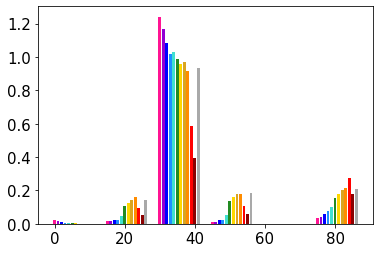

In [50]:
color_list = ['deeppink','darkviolet','blue','dodgerblue','turquoise','forestgreen','gold','goldenrod','darkorange','red','darkred','darkgray']
for i in range(12):
    plt.bar(i,da_bands[i,J_Y_forest,I_X_forest].values,color=color_list[i])
    plt.bar(i+15,da_bands[i,J_Y_grassland,I_X_grassland].values,color=color_list[i])
    plt.bar(i+30,da_bands[i,J_Y_water,I_X_water].values,color=color_list[i])
    plt.bar(i+45,da_bands[i,J_Y_cities,I_X_cities].values,color=color_list[i])
    plt.bar(i+60,da_bands[i,J_Y_bare_soil,I_X_bare_soil].values,color=color_list[i])
    plt.bar(i+75,da_bands[i,J_Y_clouds,I_X_clouds].values,color=color_list[i])


In [8]:
# Establish label clases 
viewer = napari.view_image(da_labels,name="labels_id", colormap="gist_earth")
viewer.add_image(da_true_color.transpose(...,"band"), rgb=True, name="true_color")
viewer.add_image(da_labels_RGB.transpose(...,"band"), rgb=True, name="labels_RGB")

<Image layer 'labels_RGB' at 0x7fdff4836a90>

In [9]:
%gui qt5   # this required in jupyter notebook for napari

ERROR:root:Invalid GUI request 'qt5 # this required in jupyter notebook for napari', valid ones are:dict_keys(['inline', 'nbagg', 'notebook', 'ipympl', 'widget', None, 'qt4', 'qt', 'qt5', 'wx', 'tk', 'gtk', 'gtk3', 'osx', 'asyncio'])
